In [19]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import pandas as pd

In [21]:
def plotMetric(fileName, title, plotPods=False):
    with open(fileName, 'r') as file:
        data = json.load(file)

    df = pd.DataFrame(data).T
    df['timestamp'] = pd.to_datetime(df['timestamp'], format = "%d.%m.%Y_%H:%M:%S")
    df = df.sort_values('timestamp')

    fig, ax1 = plt.subplots(figsize = (20, 12))

    # Second Y-axis (Right)
    ax2 = ax1.twinx()
    ax2.plot(df['timestamp'], df['workload'], color = 'red', linestyle = ':', linewidth = 3, label= ' Workload')
    ax2.set_ylabel('Workload (Req/s)', labelpad = 20, fontsize = 20, fontweight = 'bold')
    ax2.tick_params(axis = 'y')

    # Third Y-axis (Far Right)
    if plotPods:
        ax3 = ax1.twinx()
        ax3.spines["right"].set_position(("axes", 1.1))  # Offset by 10% of figure width
        ax3.plot(df['timestamp'], df['nInstances'], color = 'yellow', label = '# Running Pods')
        ax3.set_ylabel('# Running Pods', labelpad = 20, fontsize = 20, fontweight = 'bold')
        ax3.tick_params(axis = 'y')
        ax3.yaxis.set_major_locator(MaxNLocator(integer=True))

    # Left Y-axis
    ax1.plot(df['timestamp'], df['avgResponseTime'], color = 'blue', label = 'Average Response Time')
    ax1.plot(df['timestamp'], df['avgServiceTime'], color = 'green', label = 'Average Service Time')
    ax1.plot(df['timestamp'], df['utilization'], color = 'orange', label = 'CPU Usage (Theoretical Formula)')
    ax1.plot(df['timestamp'], df['CPUUsage (Prometheus)'], color = 'purple', label = 'CPU Usage (Prometheus)')

    ax1.set_xlabel('Timestamp', labelpad = 20, fontsize = 20)
    ax1.set_ylabel('Metrics', labelpad = 20, fontsize = 20, fontweight = 'bold')
    ax1.tick_params(axis = 'y')
    ax1.set_xticks(df['timestamp'])
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

    # Combine legends from all axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    if plotPods:
        lines3, labels3 = ax3.get_legend_handles_labels()
        ax1.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc = 'upper left', fontsize = 14)
    else:
        ax1.legend(lines + lines2, labels + labels2, loc = 'upper left', fontsize = 14)

    plt.title(title, fontweight = 'bold', fontsize = 30, pad=30)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45)
    plt.tight_layout()
    plt.show()

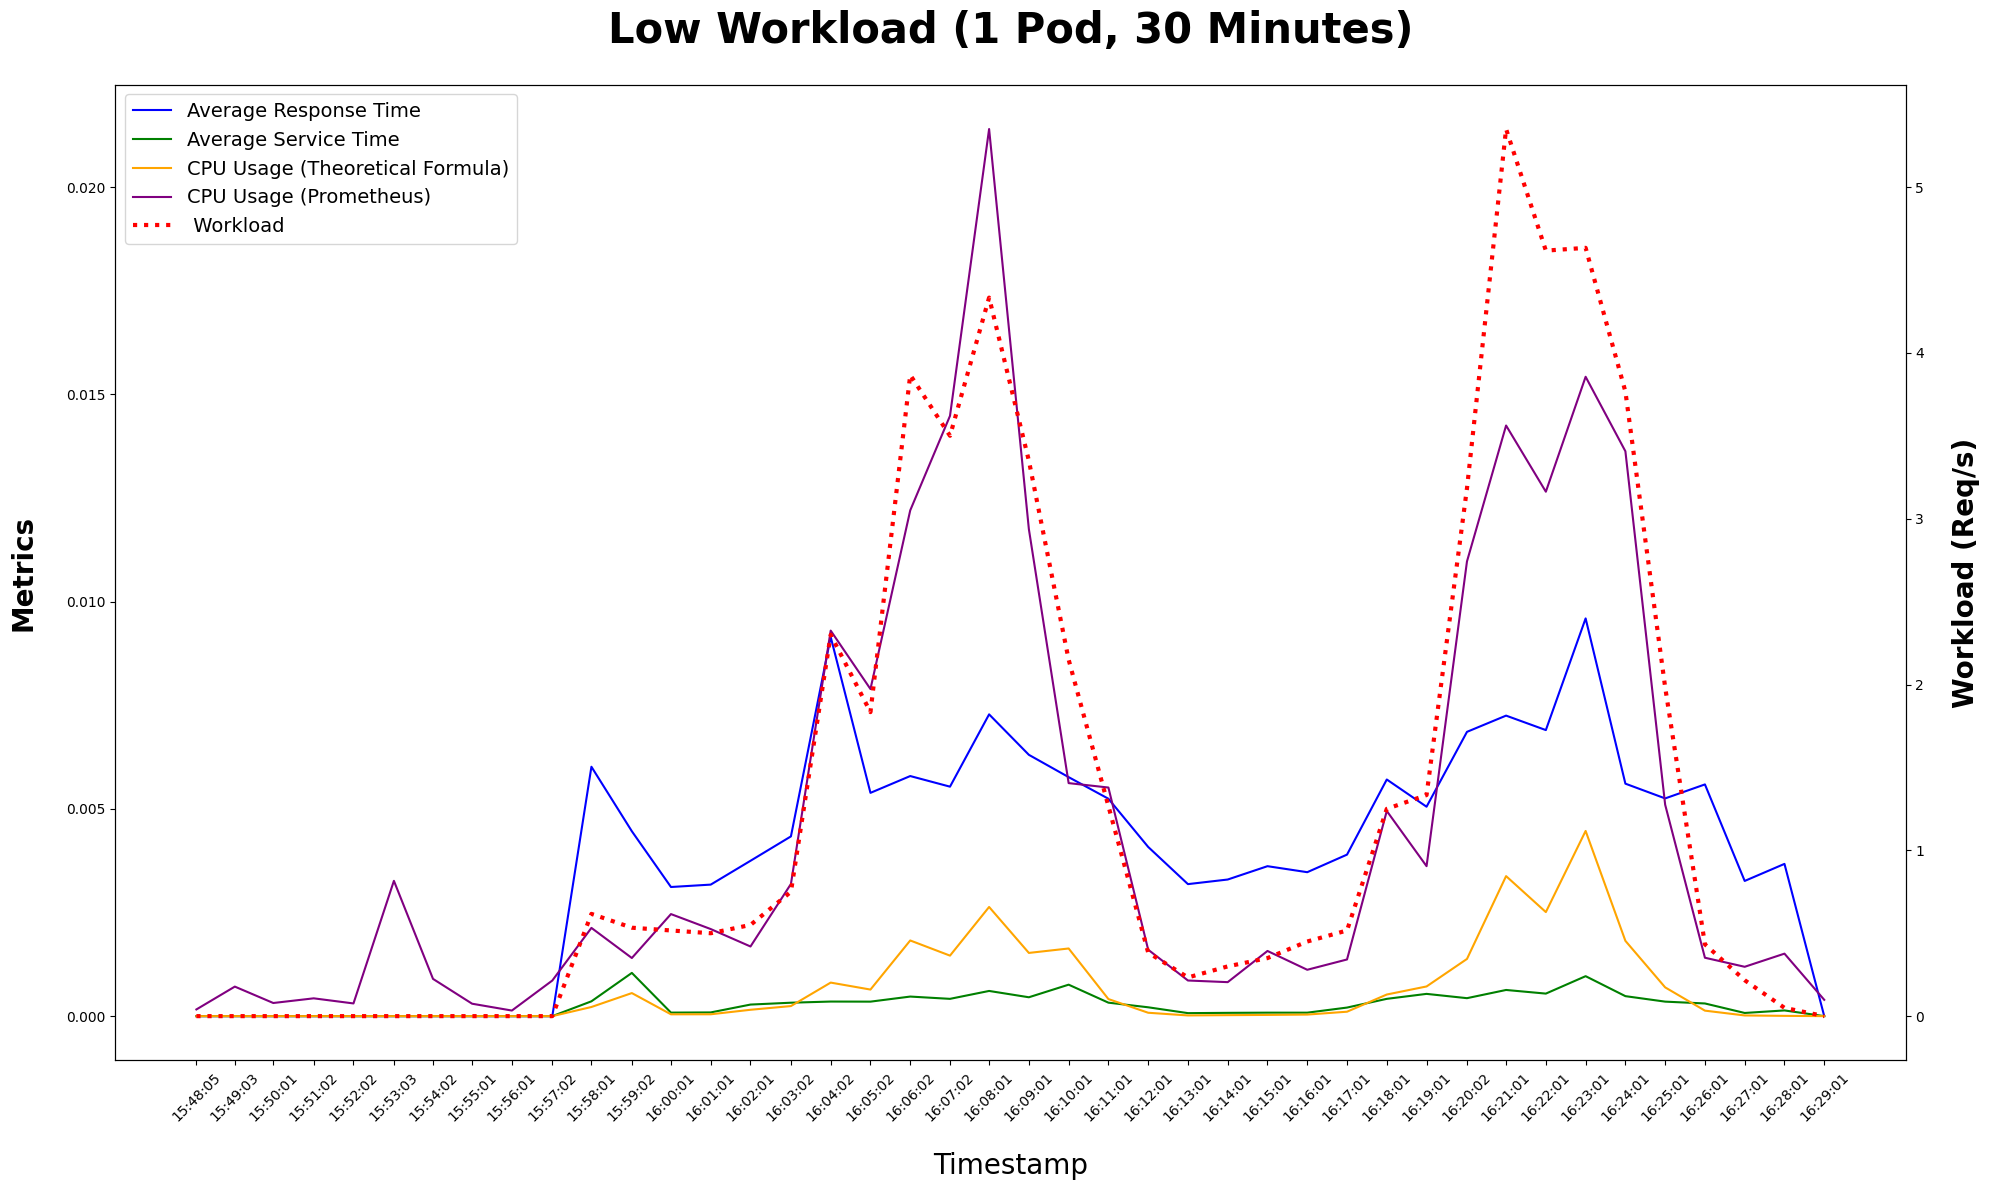

In [16]:
# Run with LowWorkload.csv and MatricesWithSameSize1
fileName = 'Low Workload - podStatus.json'

plotMetric(fileName, 'Low Workload (1 Pod, 30 Minutes)')

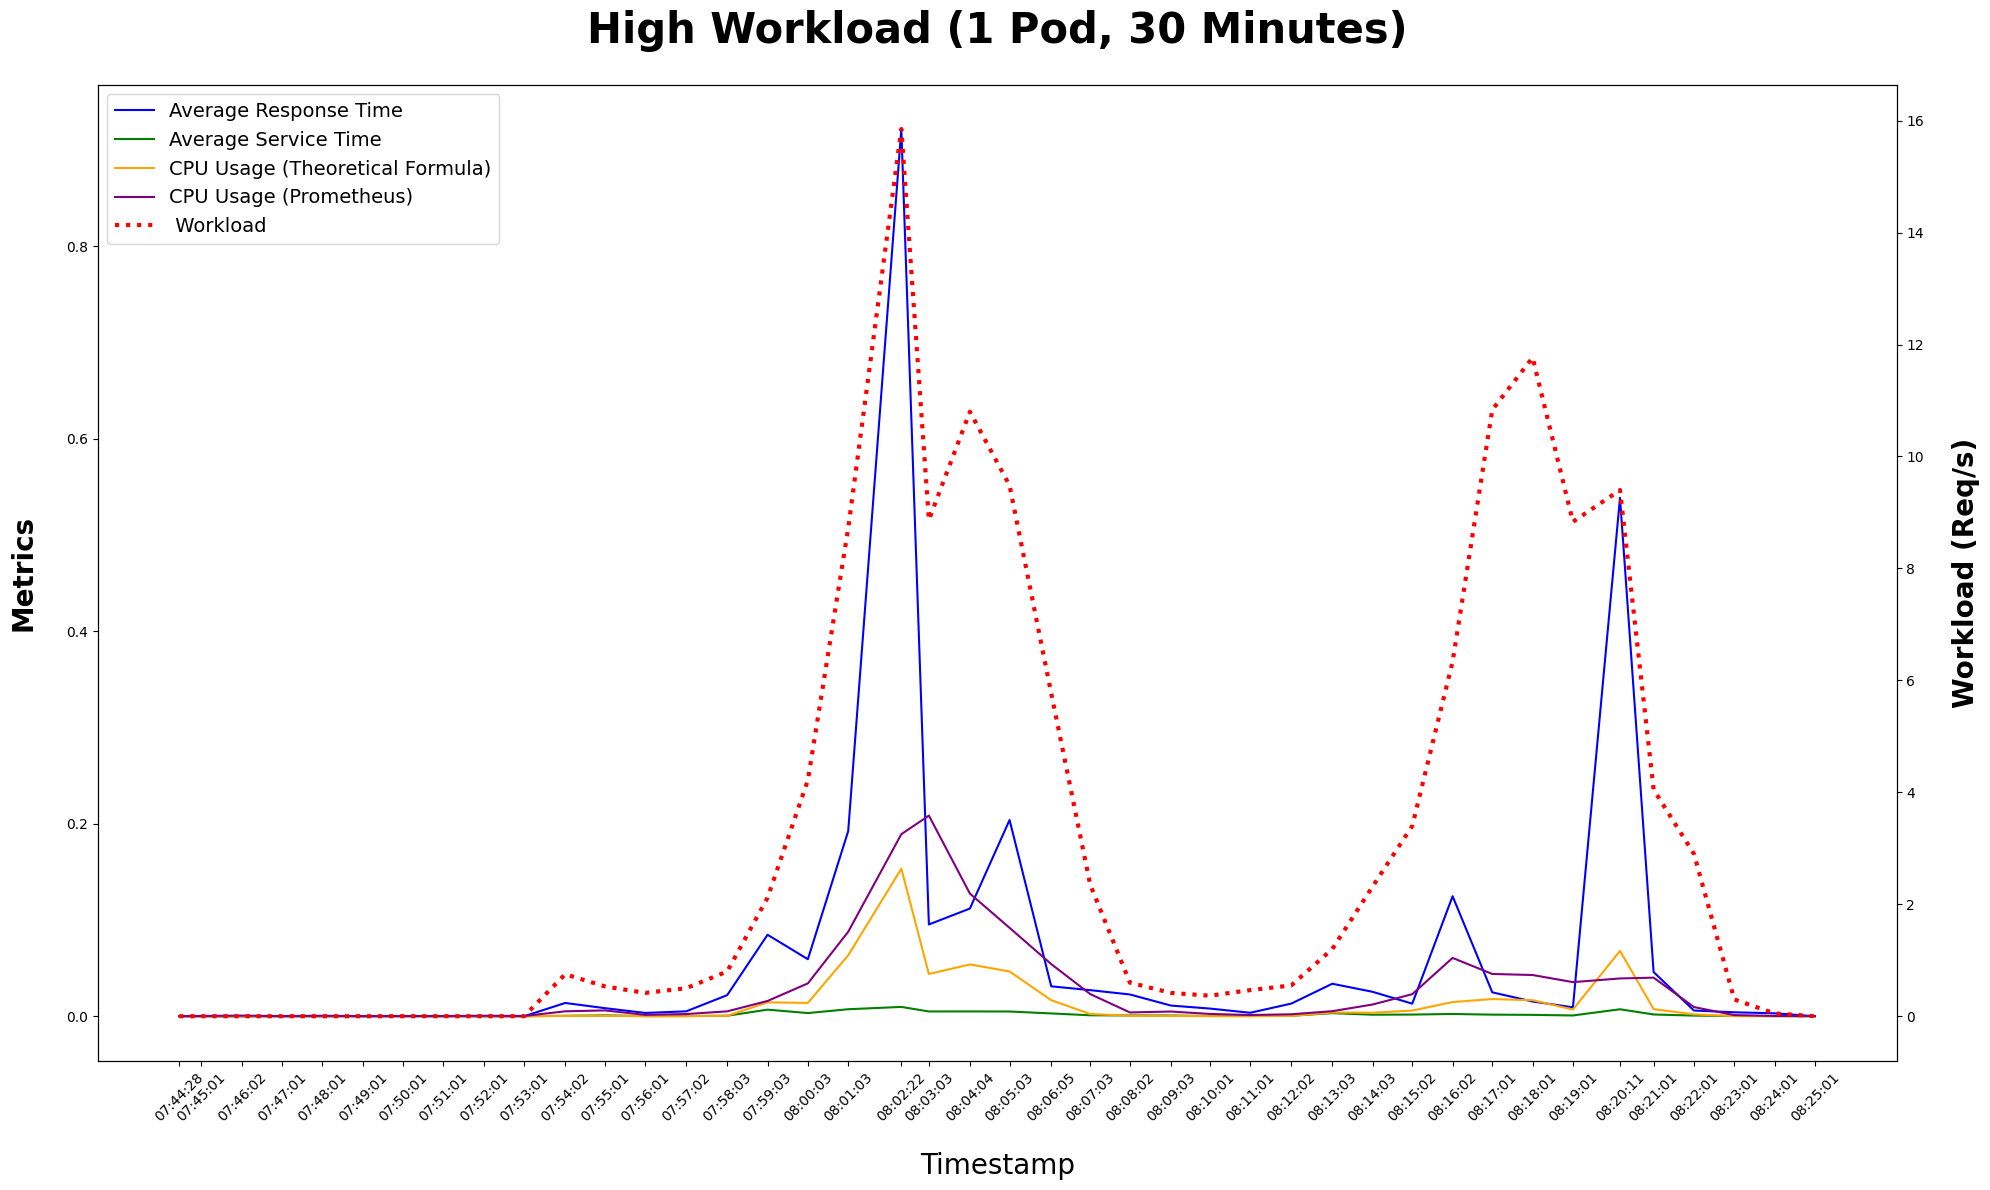

In [15]:
# Run with HighWorkload.csv and MatricesWithSameSize1
fileName = 'High Workload (50x50) - podStatus.json'

plotMetric(fileName, 'High Workload (1 Pod, 30 Minutes)')

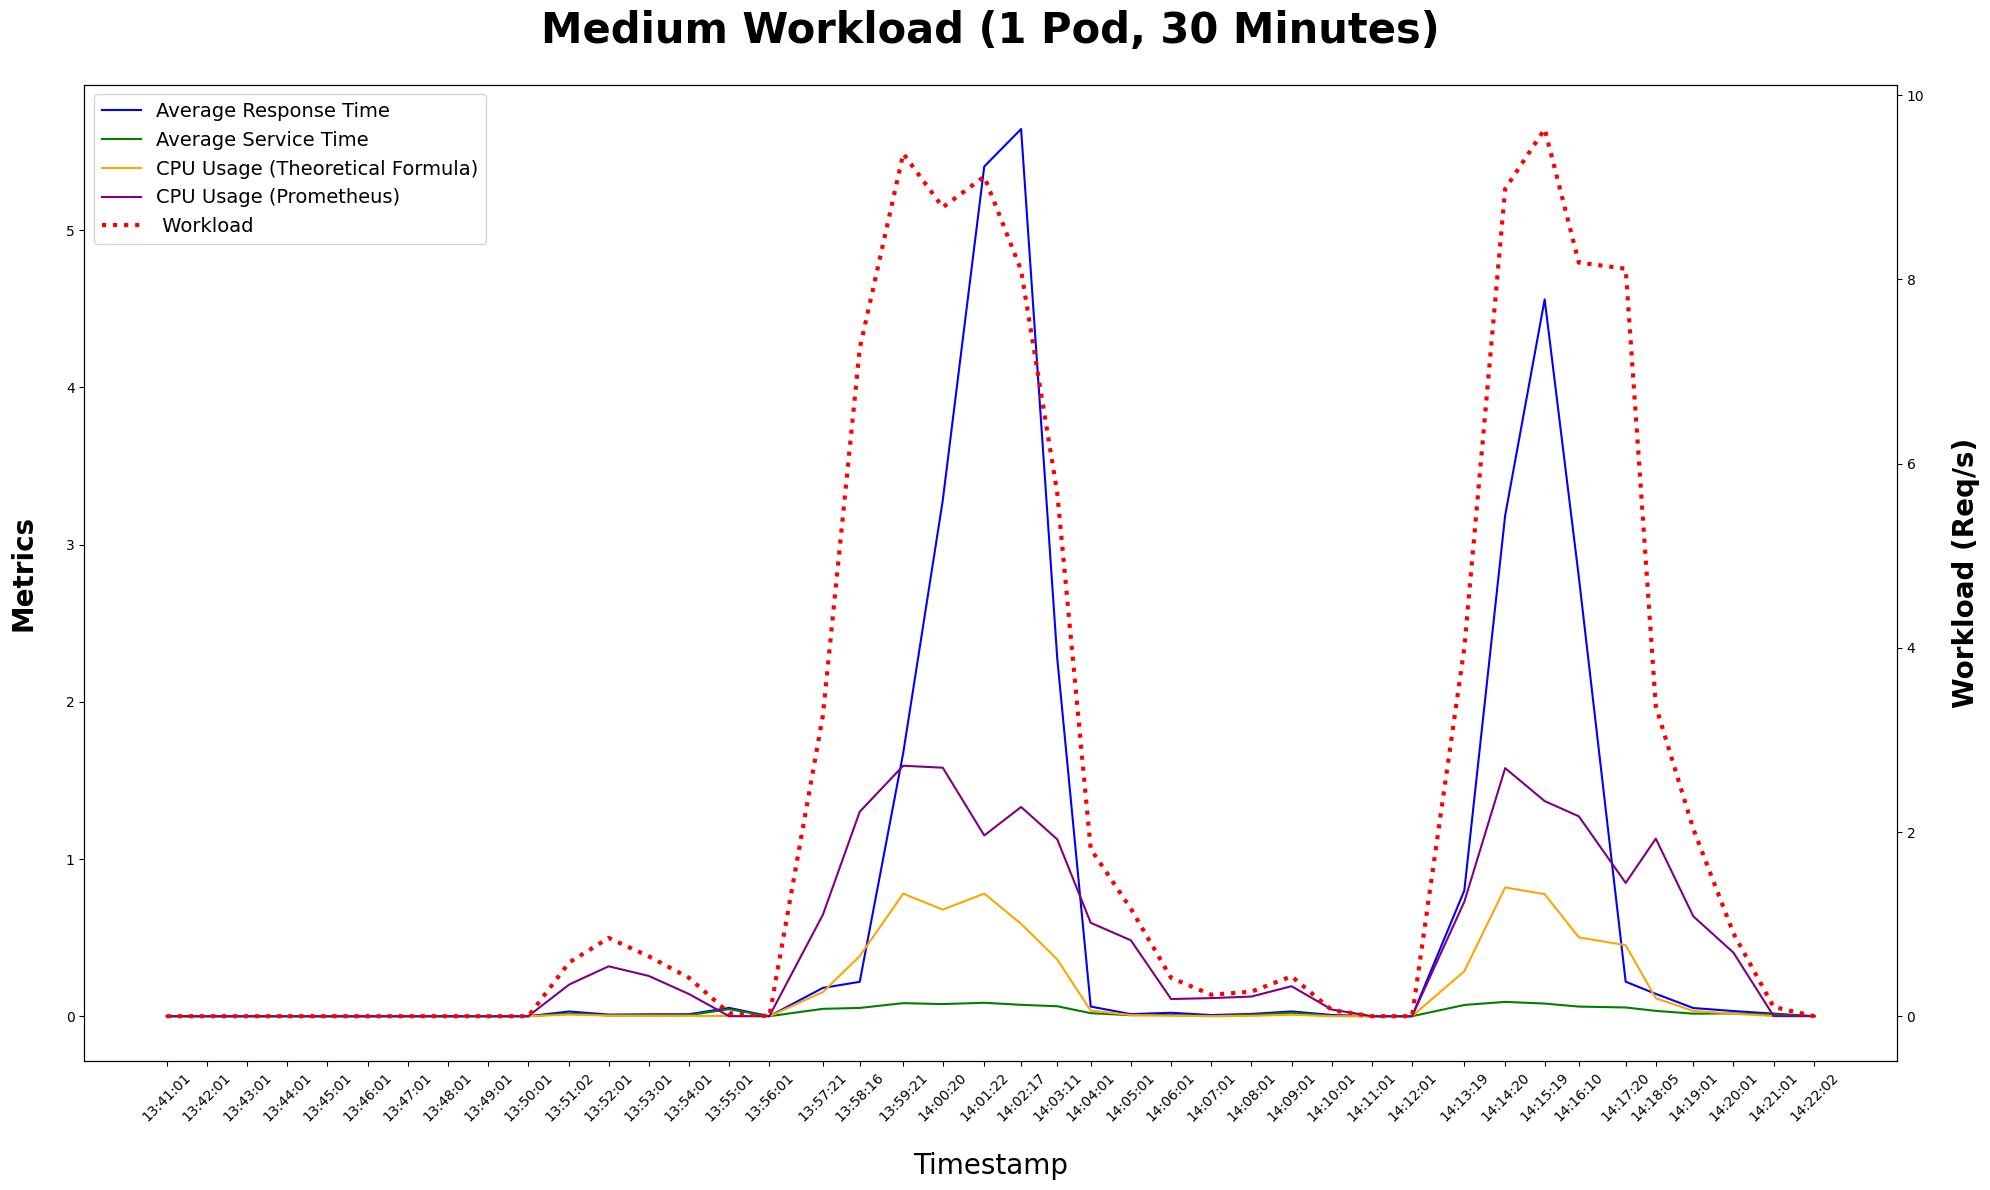

In [14]:
# Run with HighWorkload.csv and MatricesWithSameSize3
fileName = 'Medium Workload - podStatus.json'

plotMetric(fileName, 'Medium Workload (1 Pod, 30 Minutes)')

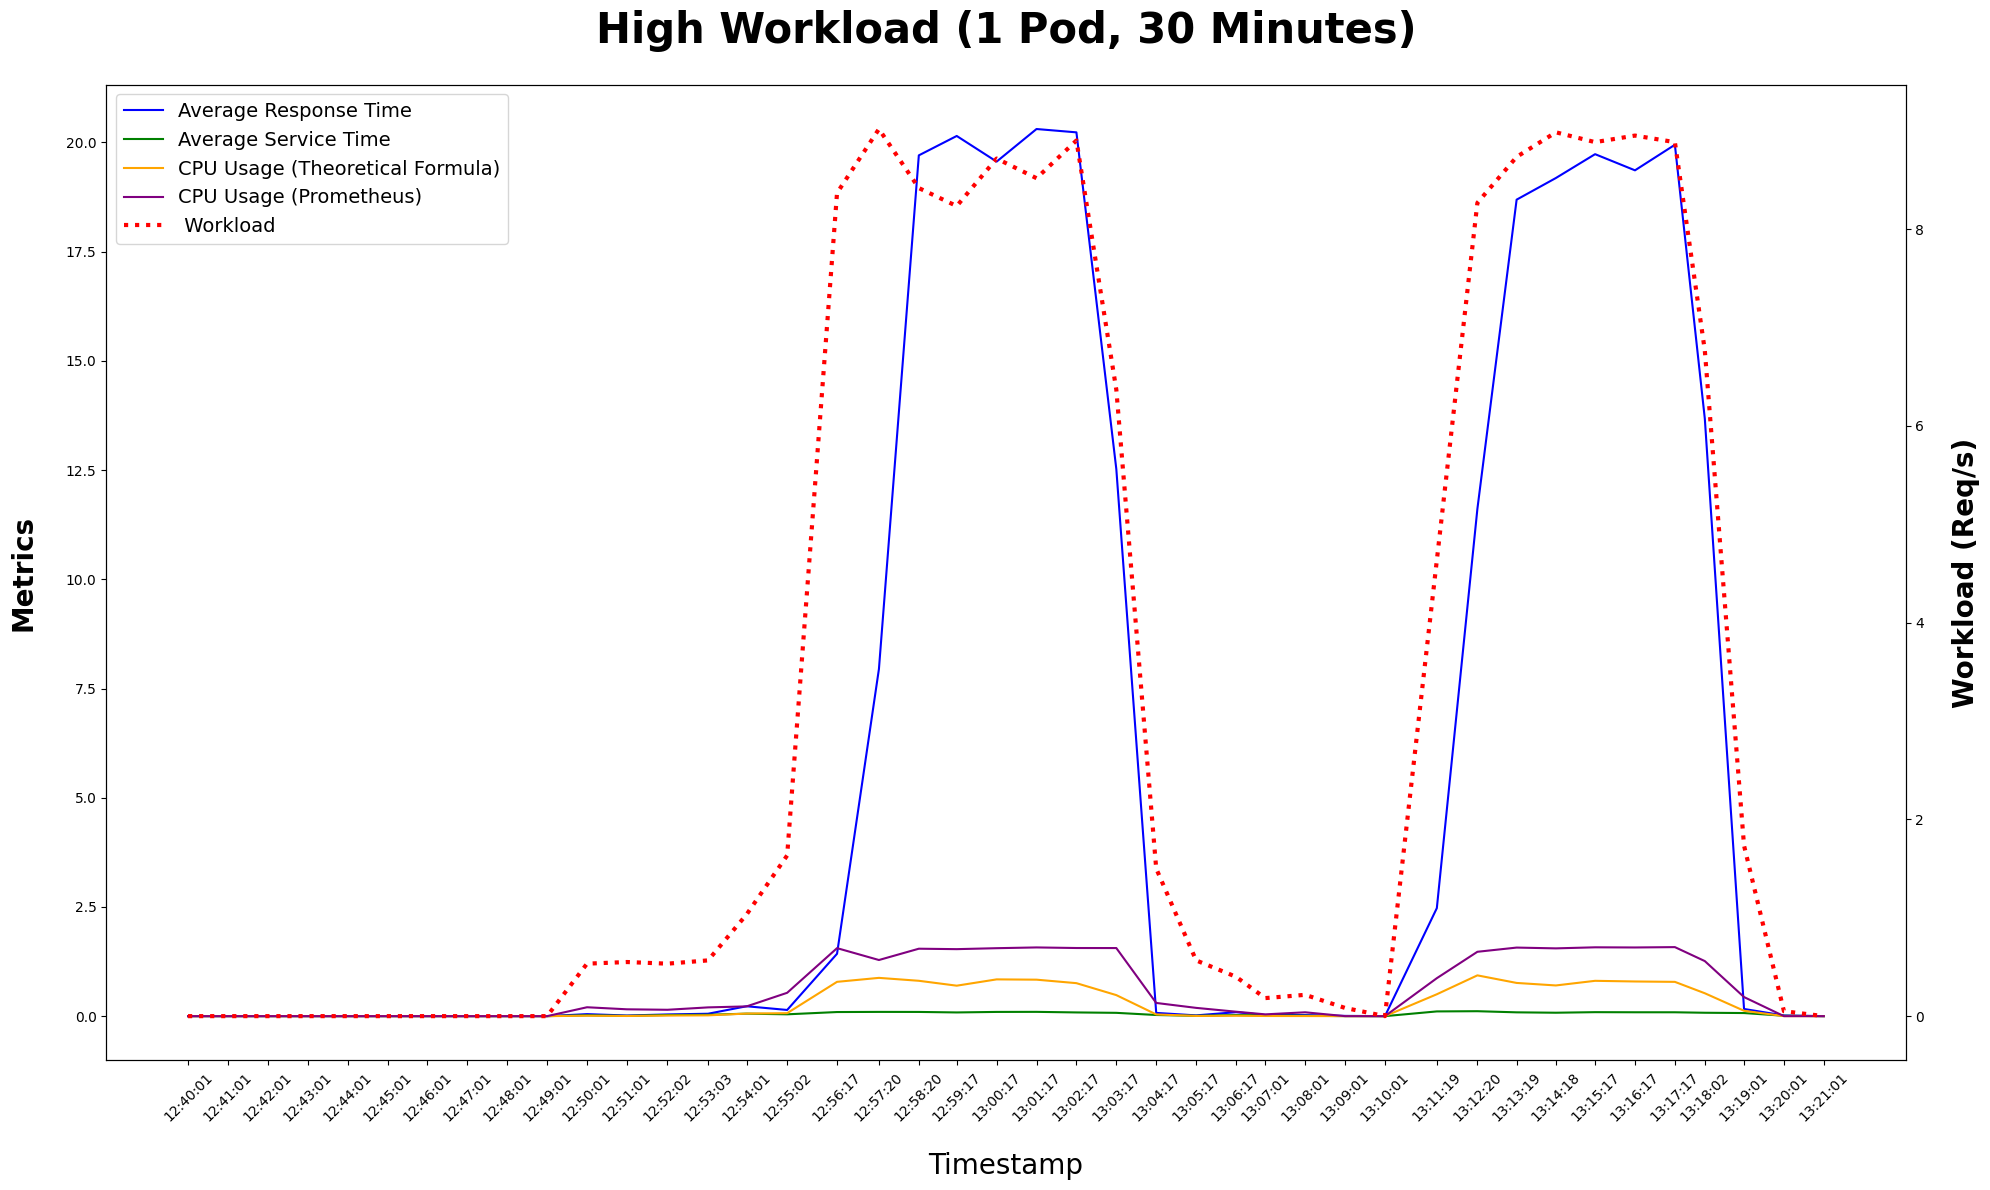

In [13]:
# Run with HighWorkload.csv and MatricesWithSameSize2
fileName = 'High Workload - podStatus.json'

plotMetric(fileName, 'High Workload (1 Pod, 30 Minutes)')

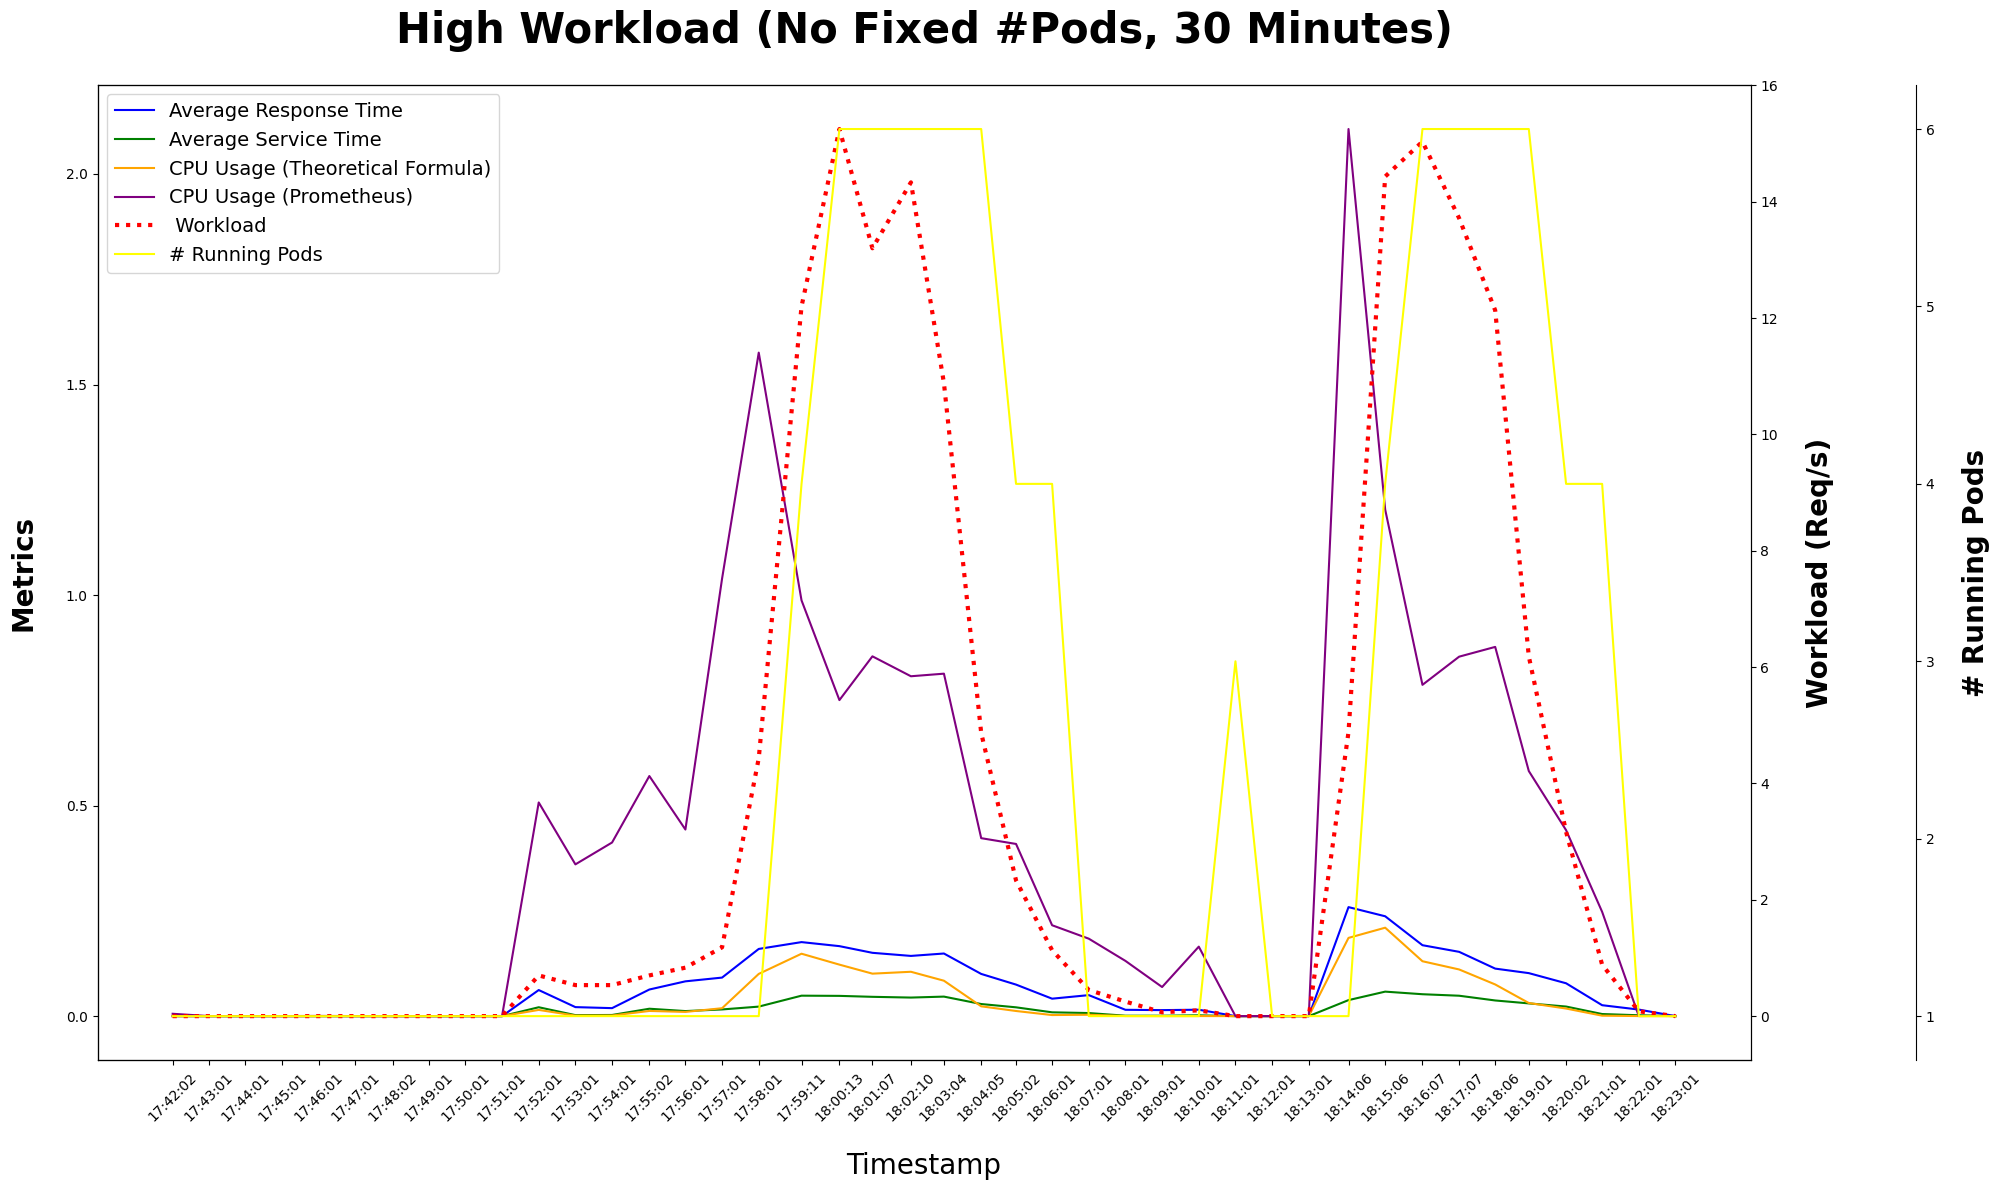

In [12]:
# Run with HighWorkload.csv and MatricesWithSameSize4
fileName = 'High Worklad with Scalable pods - podStatus.json'

plotMetric(fileName, 'High Workload (No Fixed #Pods, 30 Minutes)', plotPods = True)

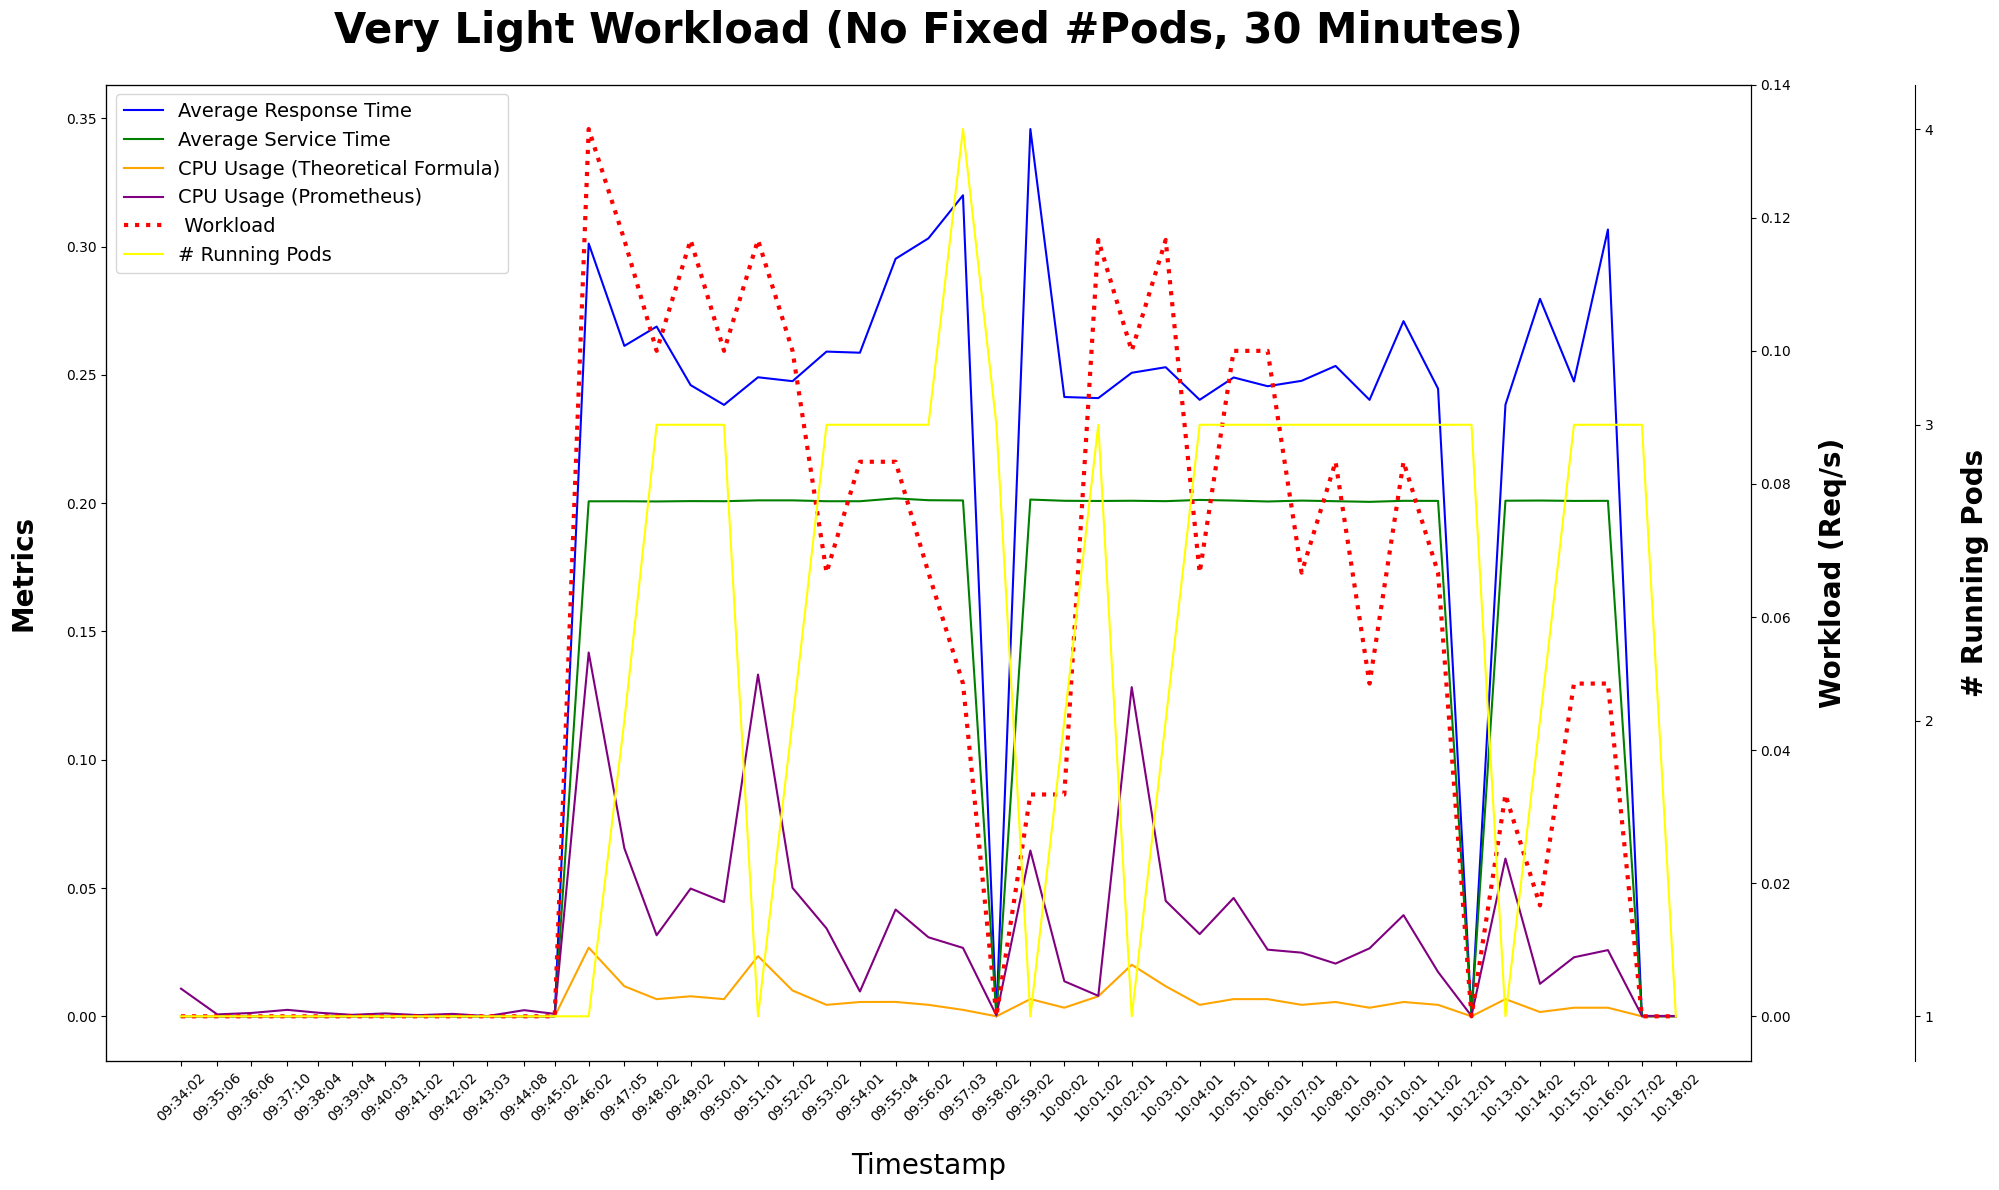

In [25]:
# Very Light Workload with the Suboptimal Agent

fileName = 'Very Ligth Worklad with Scalable pods - podStatus.json'

plotMetric(fileName, 'Very Light Workload (No Fixed #Pods, 30 Minutes)', plotPods = True)

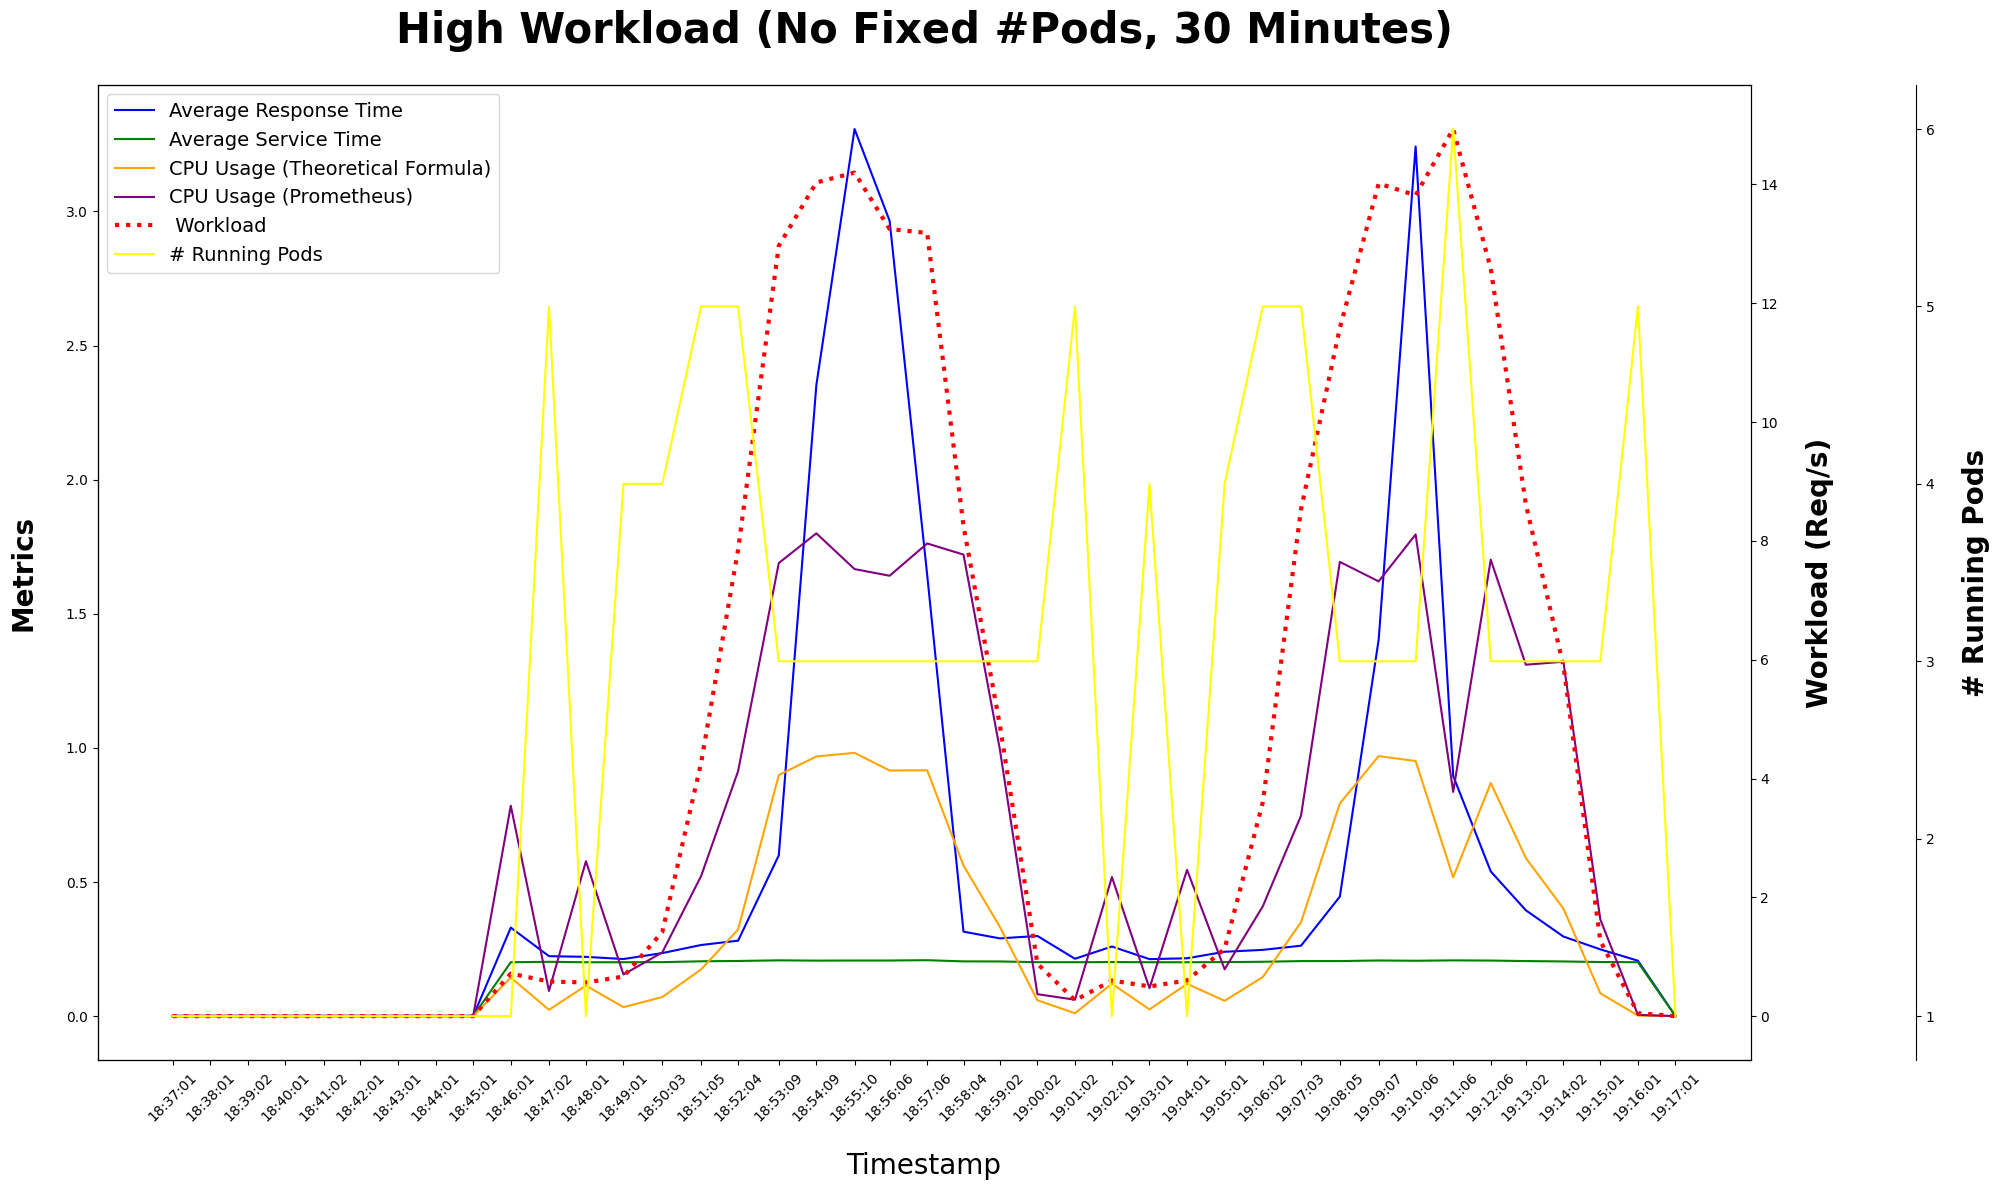

----------------- pressure -----------------
Mean: 1.4752264577268546
Std: 1.8868721358009273

----------------- avgResponseTime -----------------
Mean: 0.7376132288634273
Std: 0.9434360679004636

----------------- avgServiceTime -----------------
Mean: 0.2040048276362426
Std: 0.002715356608576946

----------------- Threshold -----------------
Mean: 0.5
Std: 0.0

----------------- queueLengthDominant -----------------
Mean: 2.9564716414778056
Std: 4.997826076112436

----------------- CPUUsage (Prometheus) -----------------
Mean: 0.6795733052594723
Std: 0.6906801885680273

----------------- workload -----------------
Mean: 6.313978494623657
Std: 5.651473253963328



In [28]:
# Optimal Agent

fileName = 'High Workload with Scalable pods - Optimal Agent.json'

plotMetric(fileName, 'High Workload (No Fixed #Pods, 30 Minutes)', plotPods = True)
with open(fileName, 'r') as file:
        data = json.load(file)

df = pd.DataFrame(data).T

data = ['pressure', 'avgResponseTime', 'avgServiceTime', 'Threshold', 'queueLengthDominant',
        'CPUUsage (Prometheus)', 'workload']

for el in data:

        print(f"----------------- {el} -----------------")
        print(f"Mean: {df[df[el] != 0][el].mean()}")
        print(f"Std: {df[df[el] != 0][el].std()}\n")

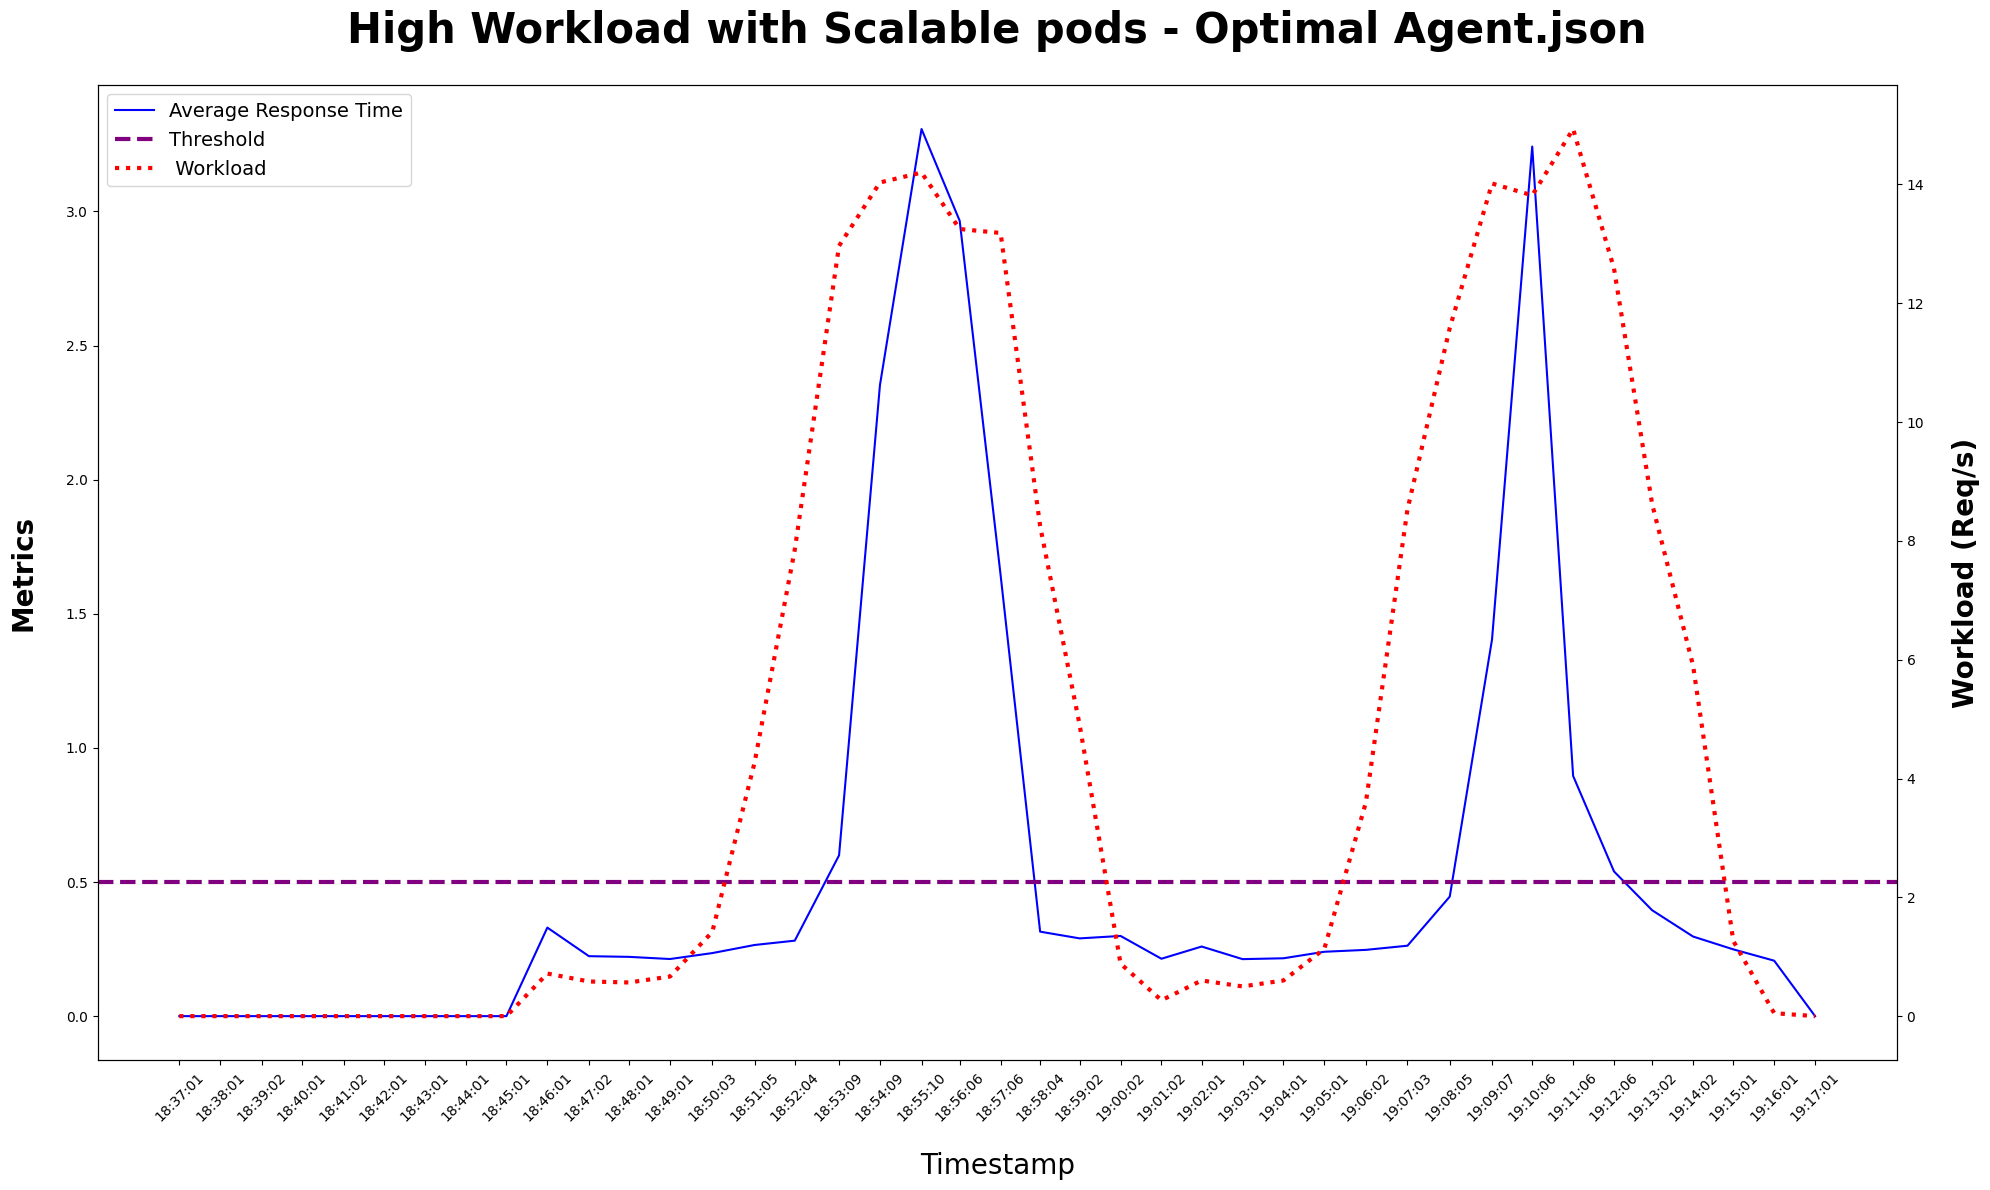

In [23]:
with open(fileName, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data).T
df['timestamp'] = pd.to_datetime(df['timestamp'], format = "%d.%m.%Y_%H:%M:%S")
df = df.sort_values('timestamp')

fig, ax1 = plt.subplots(figsize = (20, 12))

threshold = df['Threshold'][0]

# Second Y-axis (Right)
ax2 = ax1.twinx()
ax2.plot(df['timestamp'], df['workload'], color = 'red', linestyle = ':', linewidth = 3, label= ' Workload')
ax2.set_ylabel('Workload (Req/s)', labelpad = 20, fontsize = 20, fontweight = 'bold')
ax2.tick_params(axis = 'y')

# Left Y-axis
ax1.plot(df['timestamp'], df['avgResponseTime'], color = 'blue', label = 'Average Response Time')
ax1.axhline(y = threshold, color = 'purple', linestyle = '--', linewidth = 3, label = 'Threshold')
ax1.set_xlabel('Timestamp', labelpad = 20, fontsize = 20)
ax1.set_ylabel('Metrics', labelpad = 20, fontsize = 20, fontweight = 'bold')
ax1.tick_params(axis = 'y')
ax1.set_xticks(df['timestamp'])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Combine legends from all axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc = 'upper left', fontsize = 14)

plt.title('High Workload with Scalable pods - Optimal Agent.json', fontweight = 'bold', fontsize = 30, pad=30)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45)
plt.tight_layout()
plt.show()